<a href="https://colab.research.google.com/github/FaridRash/Advance-Statistical-Learnin--Semester-3/blob/main/Farid/Farid_GLM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries

In [1]:
!pip install scikeras

#Git

In [2]:
!git clone https://github.com/FaridRash/Advance-Statistical-Learnin--Semester-3

Cloning into 'Advance-Statistical-Learnin--Semester-3'...
remote: Enumerating objects: 557, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (173/173), done.
remote: Total 557 (delta 120), reused 11 (delta 11), pack-reused 373 (from 2)
Receiving objects: 100% (557/557), 57.74 MiB | 7.49 MiB/s, done.
Resolving deltas: 100% (277/277), done.


#Data Reading

In [3]:
import pandas as pd

df = pd.read_csv('/content/Advance-Statistical-Learnin--Semester-3/Dataset/df_Final.csv')
display(df.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1.0,>80,0.0,0,0.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1.0,40-60,0.0,0,0.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1.0,>80,0.0,0,0.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1.0,>80,0.0,0,0.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


#Preprocessing

###Encoding

In [4]:
from sklearn.preprocessing import LabelEncoder

# Select the 'FVC' column for encoding
fvc_col = ['FVC' , 'Tracheostomy','Spirometry','PEG','Ventilation']

df_encoded = df.copy()


# Apply Label Encoding to the 'FVC' column in df_encoded
for col in fvc_col:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Patient_ID,Visit_ID,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,133,3,0,19.0,spinale,1,3,0,0,0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,79,1,0,65.0,spinale,1,0,0,0,0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,81,1,1,79.0,bulbare,1,3,0,0,0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,214,1,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,214,2,0,51.0,spinale,1,3,0,0,0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [5]:
# Drop the 'Patient_ID' and 'Visit_ID' column
df_encoded = df_encoded.drop('Patient_ID', axis=1)
df_encoded = df_encoded.drop('Visit_ID', axis=1)


# Display the first few rows to verify
display(df_encoded.head())

,Sex,Age_at_onset,Clinical_onset_type,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Therapy,Diagnostic_delay,...,MRC_Bulbar,PUMNS_Upper_Limb,PUMNS_Lower_Limb,PUMNS_Bulbar,CNS_Linear_Score,KINGS_Total,Disease_duration,Progression_rate,ALSFRS_R,ALSAQ_5
0,0,19.0,spinale,1,3,0,0,0,Riluzolo,33.0,...,14.0,0.0,6.0,0.0,7.0,1,40.0,0.075000,45.0,0.0
1,0,65.0,spinale,1,0,0,0,0,nessuna terapia,14.0,...,13.0,1.0,4.0,3.0,15.0,1,14.0,0.714286,38.0,15.0
2,1,79.0,bulbare,1,3,0,0,0,nessuna terapia,6.0,...,11.0,4.0,4.0,2.0,7.0,1,6.0,0.833333,43.0,20.0
3,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,20.0,0.200000,44.0,20.0
4,0,51.0,spinale,1,3,0,0,0,Riluzolo,18.0,...,15.0,0.0,0.0,0.0,7.0,1,23.0,0.130435,45.0,25.0


In [6]:
# Select the columns to one-hot encode
cols_to_onehot = ['Therapy', 'Clinical_onset_type']

# Apply one-hot encoding to the selected columns in df_encoded
df_encoded = pd.get_dummies(df_encoded, columns=cols_to_onehot, dtype=int)

# Display the first few rows of the modified DataFrame to verify
display(df_encoded.head())

,Sex,Age_at_onset,Spirometry,FVC,Ventilation,Tracheostomy,PEG,Diagnostic_delay,MRC_Upper_Limb,MRC_Lower_Limb,...,ALSFRS_R,ALSAQ_5,Therapy_Edaravone,Therapy_Riluzolo,Therapy_Riluzolo e Edaravone,Therapy_nessuna terapia,Clinical_onset_type_bulbare,Clinical_onset_type_multiplo,Clinical_onset_type_respiratorio,Clinical_onset_type_spinale
0,0,19.0,1,3,0,0,0,33.0,61.0,50.0,...,45.0,0.0,0,1,0,0,0,0,0,1
1,0,65.0,1,0,0,0,0,14.0,53.0,58.0,...,38.0,15.0,0,0,0,1,0,0,0,1
2,1,79.0,1,3,0,0,0,6.0,66.0,58.0,...,43.0,20.0,0,0,0,1,1,0,0,0
3,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,44.0,20.0,0,1,0,0,0,0,0,1
4,0,51.0,1,3,0,0,0,18.0,51.0,60.0,...,45.0,25.0,0,1,0,0,0,0,0,1


###Splitting

In [7]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y) using the updated df_encoded
X = df_encoded.drop('KINGS_Total', axis=1)
y = df_encoded['KINGS_Total']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (1129, 27)
Testing set shape: (283, 27)


###SMOTE

In [8]:
from imblearn.over_sampling import SMOTE
import numpy as np

# Define which classes to oversample
target_classes = [1, 2]

# Create a dictionary with sampling strategy
# Example: balance 1 and 2 to reach size of class 3
class_counts = y_train.value_counts()
print("Before SMOTE:", class_counts)

sampling_strategy = {
    1: class_counts[3],  # make class 1 as large as class 3
    2: class_counts[3]   # make class 2 as large as class 3
}

# Apply SMOTE
sm = SMOTE(sampling_strategy=sampling_strategy, random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: KINGS_Total
4    339
3    331
2    257
1    202
Name: count, dtype: int64
After SMOTE: KINGS_Total
4    339
3    331
2    331
1    331
Name: count, dtype: int64


###Scaling

In [9]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Define the list of numerical features to standardize
numerical_features = [
    'Age_at_onset', 'Diagnostic_delay', 'MRC_Upper_Limb', 'MRC_Lower_Limb',
    'MRC_Bulbar', 'PUMNS_Upper_Limb', 'PUMNS_Lower_Limb', 'PUMNS_Bulbar',
    'CNS_Linear_Score', 'Disease_duration', 'Progression_rate', 'ALSFRS_R', 'ALSAQ_5'
]

# Separate numerical and categorical features for linear models
X_train_numerical = X_train_res[numerical_features]
X_test_numerical = X_test[numerical_features]

# Select the categorical features for linear models (all columns not in numerical_features)
categorical_features = X_train_res.columns.difference(numerical_features)
X_train_categorical = X_train_res[categorical_features]
X_test_categorical = X_test[categorical_features]


# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data for numerical features
X_train_scaled_numerical = scaler.fit_transform(X_train_numerical)
X_test_scaled_numerical = scaler.transform(X_test_numerical)

# Convert scaled numerical arrays back to DataFrames for easier concatenation
X_train_scaled_numerical_df = pd.DataFrame(X_train_scaled_numerical, columns=numerical_features, index=X_train_res.index)
X_test_scaled_numerical_df = pd.DataFrame(X_test_scaled_numerical, columns=numerical_features, index=X_test.index)

# Concatenate the scaled numerical features with the original categorical features
X_train_scaled = pd.concat([X_train_scaled_numerical_df, X_train_categorical], axis=1)
X_test_scaled = pd.concat([X_test_scaled_numerical_df, X_test_categorical], axis=1)


print("Training data shape after selective scaling:", X_train_scaled.shape)
print("Testing data shape after selective scaling:", X_test_scaled.shape)

Training data shape after selective scaling: (1332, 27)
Testing data shape after selective scaling: (283, 27)


#GLM

##With ALSFRS_R

In [10]:
# Part 1 — Fit ordinal logistic GLM on (X_train_scaled, y_train_res)

import numpy as np
import pandas as pd
from statsmodels.miscmodels.ordinal_model import OrderedModel

# --- Ensure y is coded 0..3 (if it's 1..4, remap)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1  # -> {0,1,2,3}

# --- Ensure X is a numeric DataFrame (no constant; OrderedModel handles thresholds)
if isinstance(X_train_scaled, np.ndarray):
    X_tr = pd.DataFrame(X_train_scaled)
else:
    X_tr = X_train_scaled.copy()
X_tr = X_tr.astype(float)

# --- Fit proportional-odds (logit link)
mod_glm = OrderedModel(y_tr.values, X_tr, distr="logit")
res_glm = mod_glm.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM (train) ===")
print(res_glm.summary())


=== Ordinal Logistic GLM (train) ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -931.02
Model:                   OrderedModel   AIC:                             1922.
Method:            Maximum Likelihood   BIC:                             2078.
Date:                Wed, 03 Sep 2025                                         
Time:                        16:28:51                                         
No. Observations:                1332                                         
Df Residuals:                    1302                                         
Df Model:                          27                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset                         0.1115      0

In [11]:
# Part 2 — Evaluate GLM on test data

from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np
import pandas as pd

# --- Ensure y_test is coded 0..3
y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1   # map to {0,1,2,3}

# --- Ensure X_test_scaled is DataFrame with correct dtype
if isinstance(X_test_scaled, np.ndarray):
    X_te = pd.DataFrame(X_test_scaled, columns=res_glm.model.exog_names)
else:
    X_te = X_test_scaled.copy()
X_te = X_te.astype(float)

# --- Predict class probabilities
probs = res_glm.predict(X_te)          # shape = (n_test, 4)
yhat  = np.asarray(probs).argmax(axis=1)

# --- Metrics
acc  = accuracy_score(y_te, yhat)
omae = mean_absolute_error(y_te, yhat)
cm   = confusion_matrix(y_te, yhat, labels=[0,1,2,3])

print("=== Test set evaluation ===")
print("Accuracy:", round(acc, 3))
print("Ordinal MAE:", round(omae, 3))
print("\nConfusion matrix (rows=true, cols=pred):\n", cm)


=== Test set evaluation ===
Accuracy: 0.661
Ordinal MAE: 0.367

Confusion matrix (rows=true, cols=pred):
 [[31 16  1  0]
 [15 23 15  0]
 [ 7 20 49  7]
 [ 0  0 15 84]]


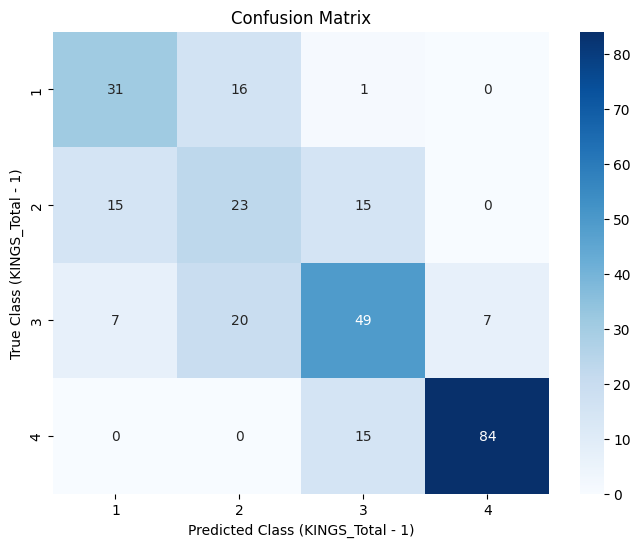

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define class labels for the confusion matrix
class_labels = ['1', '2', '3', '4']

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)

# Add labels and title
plt.xlabel('Predicted Class (KINGS_Total - 1)')
plt.ylabel('True Class (KINGS_Total - 1)')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

##Without ALSFRS_R

In [13]:
# Cell 1 — Remove ALSFRS_R-related columns and rebuild train/test matrices

import numpy as np
import pandas as pd

# 1) Ensure we have column names for X; if not, try to recover them from the previous fitted model
if hasattr(X_train_scaled, "columns"):
    Xtr_full = X_train_scaled.copy()
    Xte_full = X_test_scaled.copy()
    colnames = list(Xtr_full.columns)
elif "res_glm" in globals():
    # Use the previously fitted model's exog names
    colnames = list(getattr(res_glm.model, "exog_names", []))
    if not colnames:
        raise ValueError("Could not recover column names from the previous model.")
    Xtr_full = pd.DataFrame(X_train_scaled, columns=colnames)
    Xte_full = pd.DataFrame(X_test_scaled,  columns=colnames)
else:
    raise ValueError("X_train_scaled has no column names. Please provide the feature names to proceed.")

# 2) Identify ALSFRS_R columns (case-insensitive, catches one-hot names too)
drop_cols = [c for c in colnames if "ALSFRS" in c.upper()]
if not drop_cols:
    print("No columns matching 'ALSFRS' were found — proceeding without dropping.")
else:
    print("Dropping columns:", drop_cols)

# 3) Build reduced design matrices
X_train_no_alsfrs = Xtr_full.drop(columns=drop_cols, errors="ignore").astype(float)
X_test_no_alsfrs  = Xte_full.drop(columns=drop_cols, errors="ignore").astype(float)

# 4) Prepare y (ensure 0..3 coding)
y_tr = pd.Series(y_train_res).astype(int)
if set(np.unique(y_tr)) == {1,2,3,4}:
    y_tr = y_tr - 1

y_te = pd.Series(y_test).astype(int)
if set(np.unique(y_te)) == {1,2,3,4}:
    y_te = y_te - 1

print("Shapes — X_train_no_alsfrs:", X_train_no_alsfrs.shape, "| X_test_no_alsfrs:", X_test_no_alsfrs.shape)


Dropping columns: ['ALSFRS_R']
Shapes — X_train_no_alsfrs: (1332, 26) | X_test_no_alsfrs: (283, 26)


In [14]:
# Cell 2 — Fit ordinal logistic GLM (no ALSFRS_R) and evaluate

from statsmodels.miscmodels.ordinal_model import OrderedModel
from sklearn.metrics import accuracy_score, mean_absolute_error, confusion_matrix
import numpy as np

# 1) Fit model on the reduced training set
mod_glm_no_alsfrs = OrderedModel(y_tr.values, X_train_no_alsfrs, distr="logit")
res_glm_no_alsfrs = mod_glm_no_alsfrs.fit(method="lbfgs", maxiter=300, disp=False)

print("=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===")
print(res_glm_no_alsfrs.summary())

# 2) Evaluate on test
probs_no_alsfrs = res_glm_no_alsfrs.predict(X_test_no_alsfrs)   # (n_test, 4)
yhat_no_alsfrs  = np.asarray(probs_no_alsfrs).argmax(axis=1)

acc_no_alsfrs  = accuracy_score(y_te, yhat_no_alsfrs)
omae_no_alsfrs = mean_absolute_error(y_te, yhat_no_alsfrs)
cm_no_alsfrs   = confusion_matrix(y_te, yhat_no_alsfrs, labels=[0,1,2,3])

print("\n=== Test set (NO ALSFRS_R) ===")
print("Accuracy   :", round(acc_no_alsfrs, 3))
print("Ordinal MAE:", round(omae_no_alsfrs, 3))
print("Confusion matrix (rows=true, cols=pred):\n", cm_no_alsfrs)


=== Ordinal Logistic GLM WITHOUT ALSFRS_R — Train Summary ===
                             OrderedModel Results                             
Dep. Variable:                      y   Log-Likelihood:                -1138.0
Model:                   OrderedModel   AIC:                             2334.
Method:            Maximum Likelihood   BIC:                             2485.
Date:                Wed, 03 Sep 2025                                         
Time:                        16:28:58                                         
No. Observations:                1332                                         
Df Residuals:                    1303                                         
Df Model:                          26                                         
                                       coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Age_at_onset             

#Temp

In [17]:
import numpy as np
import pandas as pd

def simulate_posterior(res_glm, n_draws=5000):
    # 1. Get point estimates and covariance matrix
    beta_hat = res_glm.params
    cov      = res_glm.cov_params()

    # 2. Drop cutpoints (keep only predictors)
    beta_hat = beta_hat[res_glm.model.exog_names]
    cov      = cov.loc[res_glm.model.exog_names, res_glm.model.exog_names]

    # 3. Simulate posterior draws
    draws = np.random.multivariate_normal(mean=beta_hat, cov=cov, size=n_draws)
    draws_df = pd.DataFrame(draws, columns=beta_hat.index)

    # 4. Summarize: mean, 95% CI for log-odds and odds ratios
    summary = []
    for col in draws_df.columns:
        vals = draws_df[col]
        or_vals = np.exp(vals)
        summary.append({
            "predictor": col,
            "logodds_mean": vals.mean(),
            "logodds_2.5%": np.percentile(vals, 2.5),
            "logodds_97.5%": np.percentile(vals, 97.5),
            "OR_mean": or_vals.mean(),
            "OR_2.5%": np.percentile(or_vals, 2.5),
            "OR_97.5%": np.percentile(or_vals, 97.5),
        })
    return pd.DataFrame(summary).set_index("predictor")

# Run for both models
post_glm        = simulate_posterior(res_glm)
post_glm_noa    = simulate_posterior(res_glm_no_alsfrs)

# Display
print("=== With ALSFRS_R ===")
display(post_glm.sort_values("OR_mean", ascending=False))

print("=== Without ALSFRS_R ===")
display(post_glm_noa.sort_values("OR_mean", ascending=False))


=== With ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,1.814607,1.356836,2.274507,6.308126,3.883886,9.723123
Therapy_Edaravone,1.603231,0.828733,2.384611,5.381902,2.290415,10.854839
Clinical_onset_type_respiratorio,1.183775,-0.539384,2.921574,4.783868,0.583107,18.570489
2/3,1.349550,1.241137,1.454688,3.861426,3.459545,4.283149
Therapy_nessuna terapia,1.121756,0.444950,1.781304,3.256428,1.560413,5.937596
MRC_Upper_Limb,0.967619,0.733628,1.201528,2.650809,2.082623,3.325195
Therapy_Riluzolo e Edaravone,0.813976,-0.123872,1.758475,2.535707,0.883493,5.803581
1/2,0.927365,0.826365,1.028501,2.531119,2.284998,2.796871
Therapy_Riluzolo,0.606245,-0.029501,1.227932,1.929400,0.970930,3.414161


=== Without ALSFRS_R ===


,logodds_mean,logodds_2.5%,logodds_97.5%,OR_mean,OR_2.5%,OR_97.5%
predictor,,,,,,
Ventilation,3.538535,3.119654,3.947057,35.204324,22.638537,51.782771
Clinical_onset_type_multiplo,1.530124,-0.362373,3.411256,7.403919,0.696023,30.303313
Clinical_onset_type_respiratorio,1.614878,-0.056650,3.284273,7.144777,0.944925,26.689575
Therapy_Edaravone,1.770272,1.046820,2.503969,6.297685,2.848578,12.230942
PEG,1.496047,0.326090,2.664120,5.331238,1.385541,14.355320
Therapy_Riluzolo e Edaravone,1.480656,0.593391,2.392727,4.891616,1.810117,10.943300
2/3,1.004837,0.901224,1.107327,2.735297,2.462616,3.026258
ALSAQ_5,0.933063,0.747642,1.116093,2.553469,2.112014,3.052902
Therapy_nessuna terapia,0.777056,0.123635,1.413901,2.298473,1.131603,4.111967


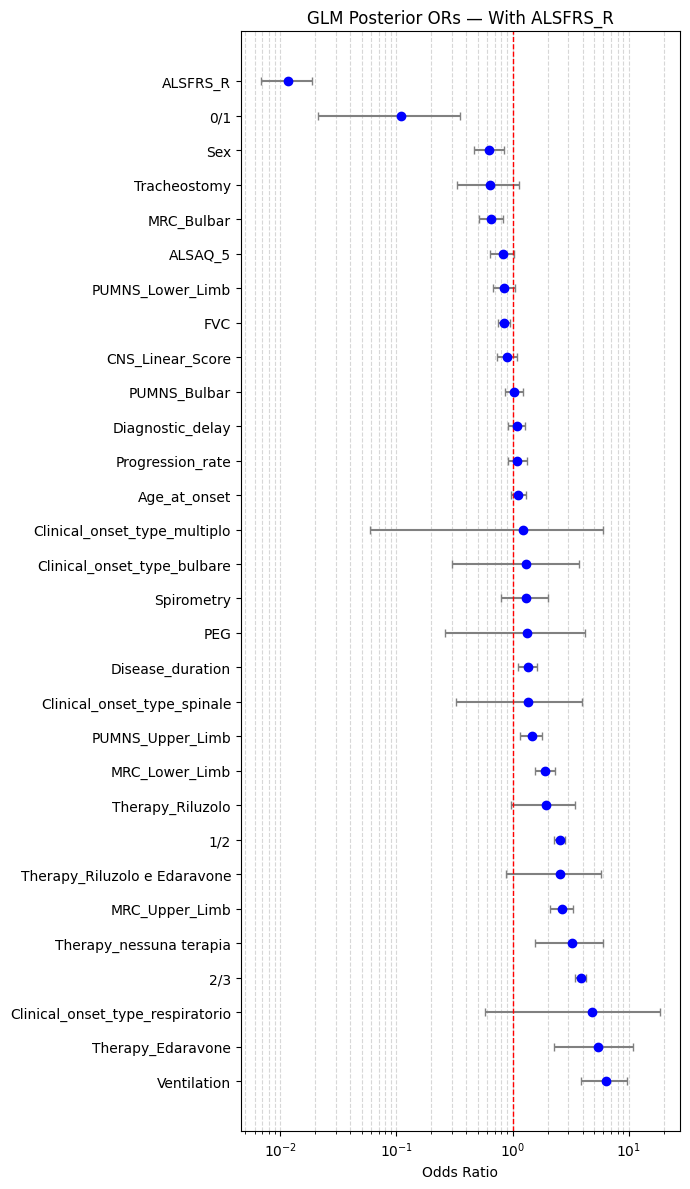

In [29]:
import matplotlib.pyplot as plt

def plot_forest(post_df, title="Posterior Odds Ratios (95% CI)", figsize=(7, None), sort_by="OR_mean"):
    # Sort predictors (optional)
    post_df = post_df.sort_values(by=sort_by)

    # Plot setup
    n = len(post_df)
    figsize = (figsize[0], n * 0.4 if figsize[1] is None else figsize[1])
    fig, ax = plt.subplots(figsize=figsize)

    # Extract values
    or_means = post_df["OR_mean"]
    or_lows  = post_df["OR_2.5%"]
    or_highs = post_df["OR_97.5%"]
    labels   = post_df.index.tolist()
    y_pos    = range(len(post_df))

    # Error bars (horizontal)
    ax.errorbar(
        x=or_means, y=y_pos,
        xerr=[or_means - or_lows, or_highs - or_means],
        fmt='o', color='blue', ecolor='gray', capsize=3
    )

    # Reference line at OR = 1 (no effect)
    ax.axvline(x=1.0, color='red', linestyle='--', linewidth=1)

    # Axes formatting
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.set_xlabel("Odds Ratio")
    ax.set_title(title)
    ax.invert_yaxis()  # Highest OR at top
    ax.set_xscale('log')  # Log scale for ORs

    plt.grid(True, which='both', axis='x', linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_forest(post_glm, title="GLM Posterior ORs — With ALSFRS_R")


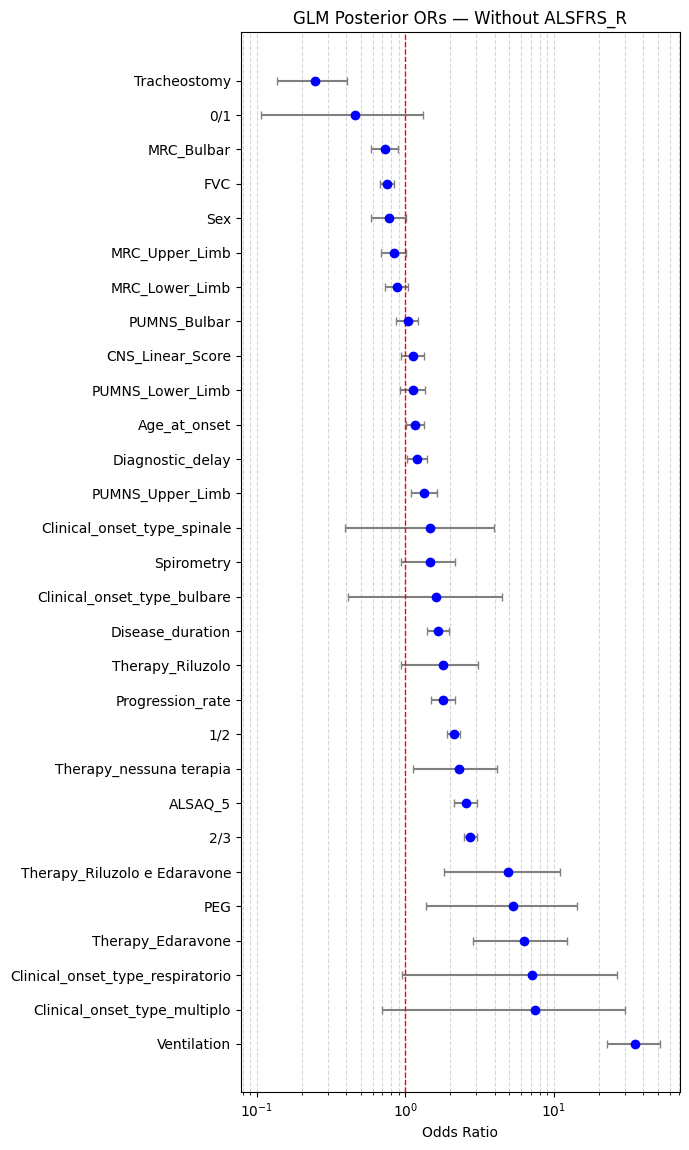

In [30]:
plot_forest(post_glm_noa, title="GLM Posterior ORs — Without ALSFRS_R")


##Misclassification

In [26]:
# Example indices
sample_idx_correct = df_eval[df_eval["correct"] == True].index[0]
sample_idx_error   = df_eval[df_eval["correct"] == False].index[0]


In [27]:
def plot_individual_prediction(idx, y_true, y_pred, probs, title_prefix=""):
    prob_vec = probs[idx]
    classes = [f"Stage {i}" for i in range(len(prob_vec))]

    plt.figure(figsize=(6,3))
    bars = plt.bar(classes, prob_vec, color='skyblue')

    # Highlight predicted class
    bars[y_pred[idx]].set_color("orange")

    # Highlight true class (green border)
    plt.gca().patches[y_true[idx]].set_edgecolor("green")
    plt.gca().patches[y_true[idx]].set_linewidth(2)

    plt.ylim(0, 1)
    plt.title(f"{title_prefix} Sample #{idx} | True: {y_true[idx]} | Pred: {y_pred[idx]}")
    plt.ylabel("Predicted Probability")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


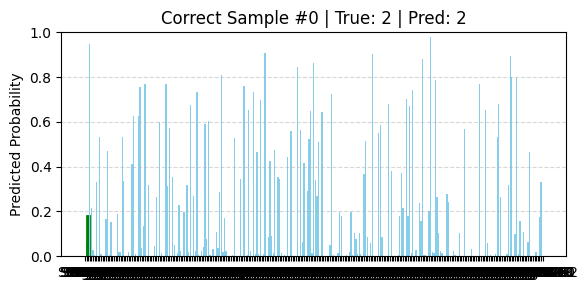

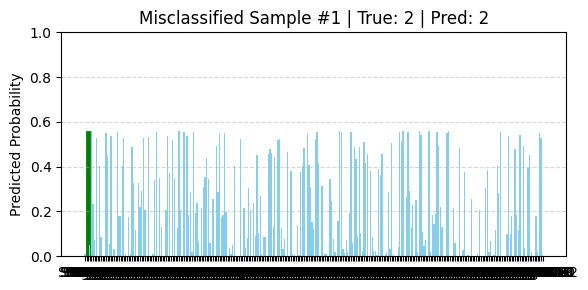

In [31]:
plot_individual_prediction(sample_idx_correct, y_true, y_pred, probs, title_prefix="Correct")
plot_individual_prediction(sample_idx_error,   y_true, y_pred, probs, title_prefix="Misclassified")


In [32]:
def plot_individual_prediction(idx, y_true, y_pred, probs, title_prefix=""):
    # Ensure you're pulling just one row (1D vector)
    prob_vec = probs[idx]
    classes = [f"Stage {i}" for i in range(len(prob_vec))]

    plt.figure(figsize=(5, 3))
    bars = plt.bar(classes, prob_vec, color='skyblue')

    # Orange = predicted, Green border = true
    bars[y_pred[idx]].set_color("orange")
    bars[y_true[idx]].set_edgecolor("green")
    bars[y_true[idx]].set_linewidth(2)

    plt.ylim(0, 1)
    plt.title(f"{title_prefix} Sample #{idx} | True: {y_true[idx]} | Pred: {y_pred[idx]}")
    plt.ylabel("Predicted Probability")
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-3927762459.py:18: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


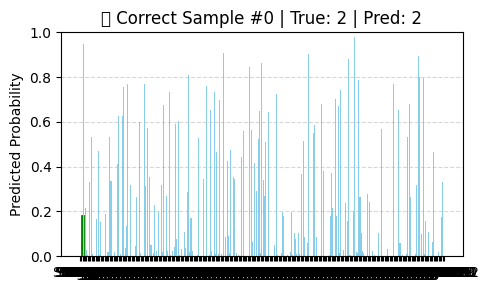

/tmp/ipython-input-3927762459.py:18: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


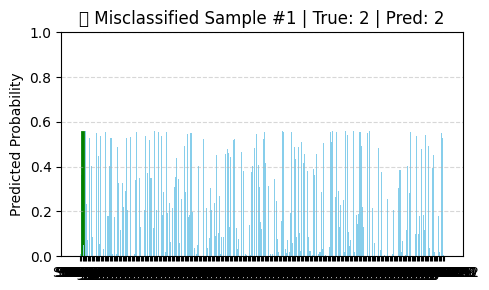

In [33]:
plot_individual_prediction(sample_idx_correct, y_true, y_pred, probs, title_prefix="✅ Correct")
plot_individual_prediction(sample_idx_error,   y_true, y_pred, probs, title_prefix="❌ Misclassified")
